<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Заключение</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
# для анализа данных
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#машинное обучение
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# метрики
from sklearn.metrics import r2_score

In [2]:
# Загрузка данных
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
# Созадим функцию для анализа 
def analysis(data):
    print(100*'-')
    print('Общая информамия:')
    print(data.info())
    
    print(100*'-')
    print('Первые 5 строк')
    display(data.head(5))
    
    print(100*'-')
    print('Количество пропусков')
    print(data.isnull().sum())
    
    print(100*'-')
    print('Количество дубликатов:')
    display(data.duplicated().sum())
    
    print(100*'-')
    print('Статистические данные')
    display(data.describe())
    
    print(100*'-')
    print('Общиегистограммы')
    data.hist(figsize = (10, 10))
    plt.show()

----------------------------------------------------------------------------------------------------
Общая информамия:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None
----------------------------------------------------------------------------------------------------
Первые 5 строк


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


----------------------------------------------------------------------------------------------------
Количество пропусков
Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64
----------------------------------------------------------------------------------------------------
Количество дубликатов:


153

----------------------------------------------------------------------------------------------------
Статистические данные


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


----------------------------------------------------------------------------------------------------
Общиегистограммы


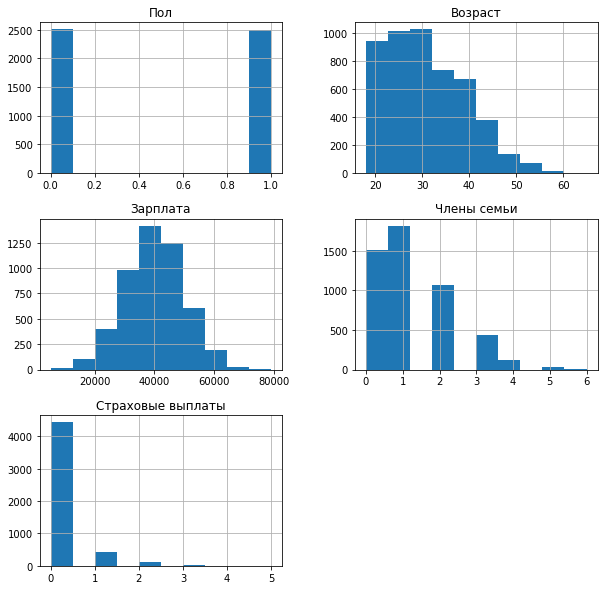

In [4]:
analysis(data)

Наш датасет состоит из 5 столбцов и 5000 строчек: 
- Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи
- Целевой признак: количество страховых выплат клиенту

Как видим из данных у нас отсутствуют пропуска, но при этом имеется 153 явных дубликата. В целом данные на первый взгляд адекватные, для решения задач проект удалим дубликаты и поменяем формат ячеек на int.

In [5]:
# Изменение формата
data['Возраст'] = data['Возраст'].astype(int)
data['Зарплата'] = data['Зарплата'].astype(int)
# удаление дубликатов 
data.drop_duplicates(inplace=True)

# проверка
data.duplicated().sum()

0

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Доказательство** :

Шифрование обратимой матрицей P

$$
a' = XPw'
$$
Формула для нового вектора весов линейной регрессии

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$

Т.к. матрица P квадратная обратимая матрица размер которой равен ширине признаков Х:

$$
X' = XP
$$

Вынесем $P^{-1}$ за скобки:


$$
w' = P^{-1}((XP)^T X)^{-1} (XP)^T y
$$

Раскроем скобки:

$$
w' = P^{-1}(P^{T}X^{T} X)^{-1} P^{T} X^{T} y
$$

Вынесем $(P^{T})^{-1}$ за скобки:

$$
w' = P^{-1}(X^{T} X)^{-1} (P^{T})^{-1} P^{T} X^{T} y
$$

Сократим выражение:

$$
w' = P^{-1} (X^{T} X)^{-1} X^{T} y
$$

Заметим, что левая часть формулы равняется w

$$
w' = P^{-1} w
$$

Подставим ее в новое предсказание: 

$$
a' = XP P^{-1} w
$$

Сократим выражение 

$$
a' = X w
$$

Отсюда следует, что: 
$$
a' = a
$$


**Ответ:** Если признаки умножить на обратимую матрицу, то качество линейной регрессии не измненится.


## Алгоритм преобразования

**Алгоритм**

Для начала разделим исходную датасает на обучающую и тестовую выборку и определим полученное значени метрики R2.

In [6]:
# выделим признаки и целевое значение
features = data.drop('Страховые выплаты',axis=1)
target = data['Страховые выплаты']

# деление на выборки
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)

r2_source = r2_score(target_test, predictions)
print('Метрика R2 для нешифрованной матрицы:', r2_source)

Метрика R2 для нешифрованной матрицы: 0.42307727615837565


Далее необходимо написать функцию, которая будет генерировать обратимую матрицу и скалярно умножать признаки на данное значение. Необходимо также проводить проверку сгенерированной матрицы на обратимость (определитель не должен быть ноль).


In [7]:
def crypt_matrix(features):
    det = 0
    while det == 0:
        matrix = np.random.randint(1, 10, (features.shape[1], features.shape[1]))
        det = np.linalg.det(matrix)
        features_cript = features @ matrix
    return matrix, features_cript

In [8]:
matrix, features_cript = crypt_matrix(features)
print('Полученная обратимая матрица для шифрования')
print(matrix)

print('Полученные признаки шифрования')
print(features_cript)

Полученная обратимая матрица для шифрования
[[9 6 5 5]
 [3 8 1 6]
 [7 4 1 2]
 [6 9 2 2]]
Полученные признаки шифрования
           0       1      2       3
0     347338  198743  49648   99453
1     266144  152377  38048   76278
2     147087   84232  21029   42174
3     291975  166986  41725   83530
4     182793  104630  26133   52373
...      ...     ...    ...     ...
4995  249996  143042  35732   71572
4996  366908  209881  52436  105006
4997  237372  135778  33924   67924
4998  228993  131009  32733   65543
4999  284299  162639  40635   81375

[4847 rows x 4 columns]


Рассчитаем метрику R2 score на шифрованных данных:

In [9]:
features_train_cript, features_test_cript, target_train_cript, target_test_cript = train_test_split(
    features_cript, target, test_size=0.25, random_state=12345)

model_cript = LinearRegression()
model_cript.fit(features_train_cript, target_train_cript)
predictions_cript = model_cript.predict(features_test_cript)

r2_source_cript = r2_score(target_test_cript, predictions_cript)
print('Метрика R2 для нешифрованной матрицы:', r2_source_cript)

Метрика R2 для нешифрованной матрицы: 0.42307727615837565


Рассчитаем разницу метрик R2:

In [10]:
np.abs(r2_source_cript-r2_source)

0.0

**Вывод**

Мы создали алгоритм преобразования таблиц для защиты персональных данных. Как видно даже после обучения на шифрованных данных заметно почти точь в точь одинаковая метрика R2 , поэтому можно считать, что данный алгоритм рабочий.

## Проверка алгоритма

Попробуем восстановить наши шифрованные данные умножением их на обртаную матрицу.

In [11]:
features_back= features_cript @ np.linalg.inv(matrix)
features_back = features_back.astype(int)
features_back.head(10)

,0,1,2,3
0,0,40,49600,0
1,0,45,38000,0
2,0,28,21000,0
3,0,20,41700,1
4,1,28,26100,0
5,1,42,41000,1
6,1,38,39700,1
7,1,24,38600,3
8,1,36,49700,0
9,1,32,51700,0


In [12]:
features.head(10)

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0
5,1,43,41000,2
6,1,39,39700,2
7,1,25,38600,4
8,1,36,49700,1
9,1,32,51700,1


**Вывод:** Как видно при сравнении таблиц значения после дешефрования возвращаются в читаемый вид, и совпадают с исходными данными. 

## Заключение

В данном проекте был предложен алгоритм защиты личных данных путем умножения признаков на обратимую матрицу, также была изучена возможность проведения операций машинного обучения на зашифрованных данных. При сравнение метрик мы убедились, что на шифрованных данных достигается такая же метрика R2. Данные также легко возвращаются к первоначальному виду умножением на обратную матрицу.
Данный метод может быть использован для защиты персональных данных